# BLACK AND SCHOLES

In [282]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
import pandas as pd

In [447]:
class B_S:
#     S_0: price of the underlying asset at time 0
#     K: strike price of the option
#     T: maturity date-time
#     r: risk free interest rate
#     data: the historical data used to estimate the volatility (specific format!!!!!!!!!1)
        
    def __init__(self, S_0, K, t_0, T, r, sigma_estimation, data):
        self.S_0 = S_0
        self.K = K
        self.t_0 = datetime.strptime(t_0, '%Y-%m-%d')
        self.T = datetime.strptime(T, '%Y-%m-%d')
        self.r = r
        self.sigma_estimation = sigma_estimation
        self.data = data
    
    def sigma(self):
        if self.sigma_estimation == 'hist':
            return np.std(self.data['Daily Returns'].values, ddof=1)
        elif self.sigma_estimation == 'density':
            n_returns = self.data.shape[0] - 1
            s2 = np.var(self.data[stock_data.columns[-1]].values, ddof=1)
            s = np.std(self.data[stock_data.columns[-1]].values, ddof=1)
#             E_s = (np.sqrt(n_returns - 1) * s * np.math.factorial(math.floor((n_returns - 4)/2))) / (np.sqrt(2) * np.math.factorial(math.floor((n_returns - 3)/2)))
            E_s2 = ((n_returns - 1)*s2) / (n_returns - 3)
            return np.sqrt(E_s2)
        else:
            print('Método no disponible para sigma')
    
    
    def call(self, how='single'):
        if how == 'single':
            time_until_maturity = (self.T - self.t_0).days / 365.25
        elif how == 'nel':
            days = (self.T-self.t_0).days
            time_until_maturity = np.linspace(days, 0, 100) / 365.25
#             date_range = np.linspace(self.t_0.timestamp(), self.T.timestamp(), 100)
#             time_until_maturity = np.array([datetime.fromtimestamp(ts) for ts in date_range])
        elif how == 'precios':
            precio_min = self.S_0 - 20
            precio_max = self.S_0 + 20
            precios = np.linspace(precio_min, precio_max, 100)
            time_until_maturity = (self.T - self.t_0).days / 365.25
            d1 = (np.log(precios/self.K) + (self.r + B_S.sigma(self)**2 /2)*(time_until_maturity)) / (B_S.sigma(self)*np.sqrt(time_until_maturity))
            d2 = d1 - B_S.sigma(self)*np.sqrt(time_until_maturity)
            return precios * norm.cdf(d1) - self.K * np.exp(-self.r * time_until_maturity) * norm.cdf(d2)


            
        d1 = (np.log(self.S_0/self.K) + (self.r + B_S.sigma(self)**2 /2)*(time_until_maturity)) / (B_S.sigma(self)*np.sqrt(time_until_maturity))
        d2 = d1 - B_S.sigma(self)*np.sqrt(time_until_maturity)
        return self.S_0 * norm.cdf(d1) - self.K * np.exp(-self.r * time_until_maturity) * norm.cdf(d2)
    
    def put(self, how='single'):
        if how == 'single':
            time_until_maturity = (self.T - self.t_0).days / 365.25
        elif how == 'nel':
            days = (self.T-self.t_0).days
            time_until_maturity = np.linspace(days, 0, 100) / 365.25
#             date_range = np.linspace(self.t_0.timestamp(), self.T.timestamp(), 100)
#             time_until_maturity = [datetime.fromtimestamp(ts) for ts in date_range]

        d1 = np.log((self.S_0/self.K) + (self.r + B_S.sigma(self)/2)*(time_until_maturity)) / (B_S.sigma(self)*np.sqrt(time_until_maturity))
        d2 = d1 - B_S.sigma(self)*np.sqrt(time_until_maturity)
        return self.K * np.exp(-self.r * time_until_maturity) * norm.cdf(-d2) - (self.S_0 * norm.cdf(-d1))
    

    def plot_time(self):
        prices_call = B_S.call(self, 'nel')
        prices_put = B_S.put(self, 'nel')
#         date_range = np.linspace(self.t_0.timestamp(), self.T.timestamp(), 100)
#         time_until_maturity = [datetime.fromtimestamp(ts) for ts in date_range]
        days = (self.T-self.t_0).days / 365.25
        time_until_maturity = np.linspace(days, 0, 100)
        plt.figure(figsize=(15, 9))
        plt.plot(time_until_maturity, prices_call, label='Call Option')
        plt.plot(time_until_maturity, prices_put, label='Put Option')
        plt.xlabel('Time to Maturity (Years)')
        plt.ylabel('Option Price')
        plt.title('Black-Scholes Option Pricing Model')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def plot_prices(self):
        precios_call = []
        precios_put = []
        precio_min = self.S_0 - 20
        precio_max = self.S_0 + 20
        precios = np.linspace(precio_min, precio_max, 100) 
        for i in precios:
            precios_call.append(B_S(i, self.K, self.t_0.strftime('%Y-%m-%d'), self.T.strftime('%Y-%m-%d'), self.r, self.sigma_estimation, self.data).call())
            precios_put.append(B_S(i, self.K, self.t_0.strftime('%Y-%m-%d'), self.T.strftime('%Y-%m-%d'), self.r, self.sigma_estimation, self.data).put())
        
        plt.figure(figsize=(15, 9))
        plt.plot(precios, precios_call, label='Call Option')
        plt.plot(precios, precios_put, label='Put Option')
        plt.axvline(strike_price, color='red', linestyle='--', label='Strike Price')
        plt.xlabel('Stock price')
        plt.ylabel('Option Price')
        plt.title('Black-Scholes')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    def plot_profit(self):
        premium = 0.1 * self.S_0
        precio_min = self.S_0 - 10
        precio_max = self.S_0 + 30
        precios = np.linspace(precio_min, precio_max, 100) 
        plt.figure(figsize=(15, 9))
        plt.plot(precios, 0*precios, color='black')
        plt.axvline(strike_price, color='red', linestyle='--', label='Strike Price')
        plt.plot(precios, np.maximum(0, precios - self.K ), label='Call payoff', color='lightblue', linestyle='--')
        plt.plot(precios, premium - np.maximum(0, precios - self.K), label='Put payoff', color='green')
        plt.plot(precios, np.maximum(0, precios - self.K ) - premium, label='Call profit', color='blue')
        plt.plot(precios, -np.maximum(0, precios - self.K), label='Put profit', linestyle='--', color='lightgreen')
        plt.yticks([premium, -premium], labels=['premium', '- premium'])

        plt.legend(loc='best', fontsize=15, ncol=1)
        plt.grid()

In [449]:
import yfinance as yf
stock_symbol = "AAPL" 
start_date = "2022-01-01"
end_date = "2023-01-01"
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data['Daily Returns'] = stock_data['Adj Close'].pct_change() * 100 
stock_data = stock_data.fillna(0)
stock_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Returns
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953873,104487900,0.000000
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669998,99310400,-1.269144
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943985,94537600,-2.659995
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056961,96904000,-1.669340
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225052,86709100,0.098844
...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900,-0.279821
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800,-1.387833
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339417,85438400,-3.068521


In [450]:
model = B_S(100, 100, '2023-01-01', '2023-01-30', 0.15, 'density', stock_data)
model.call(), model.put()

(25.34248144553939, 23.756298315879654)

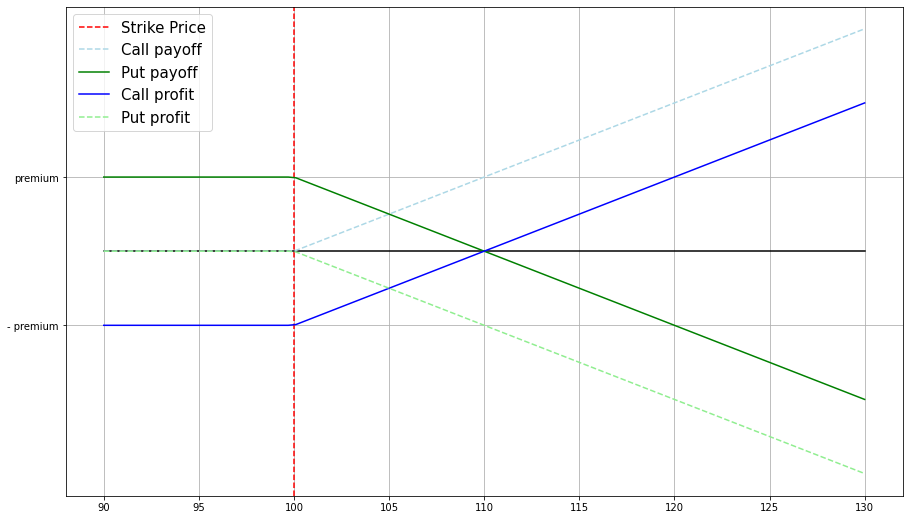

In [451]:
model.plot_profit()

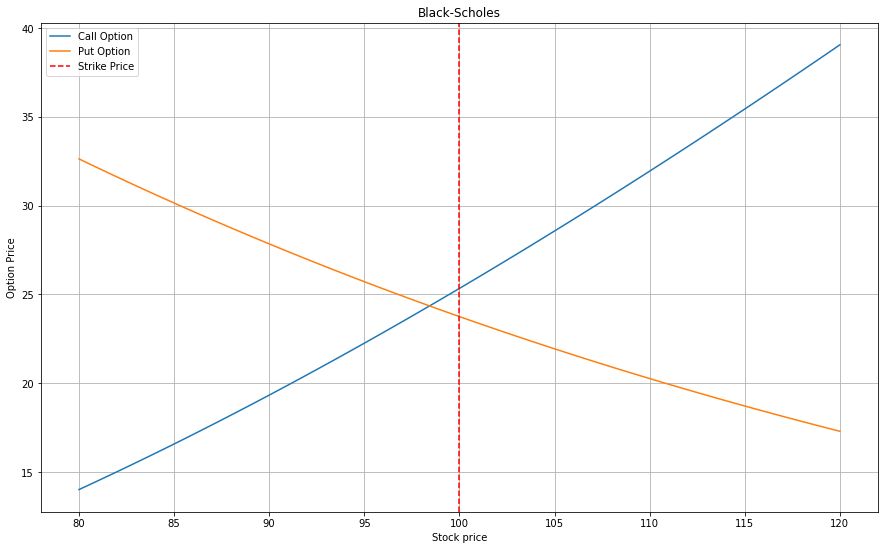

In [453]:
model.plot_prices()

<ipython-input-447-d2bc57db94bf>:50: RuntimeWarning: invalid value encountered in divide
  d1 = (np.log(self.S_0/self.K) + (self.r + B_S.sigma(self)**2 /2)*(time_until_maturity)) / (B_S.sigma(self)*np.sqrt(time_until_maturity))
<ipython-input-447-d2bc57db94bf>:63: RuntimeWarning: invalid value encountered in divide
  d1 = np.log((self.S_0/self.K) + (self.r + B_S.sigma(self)/2)*(time_until_maturity)) / (B_S.sigma(self)*np.sqrt(time_until_maturity))


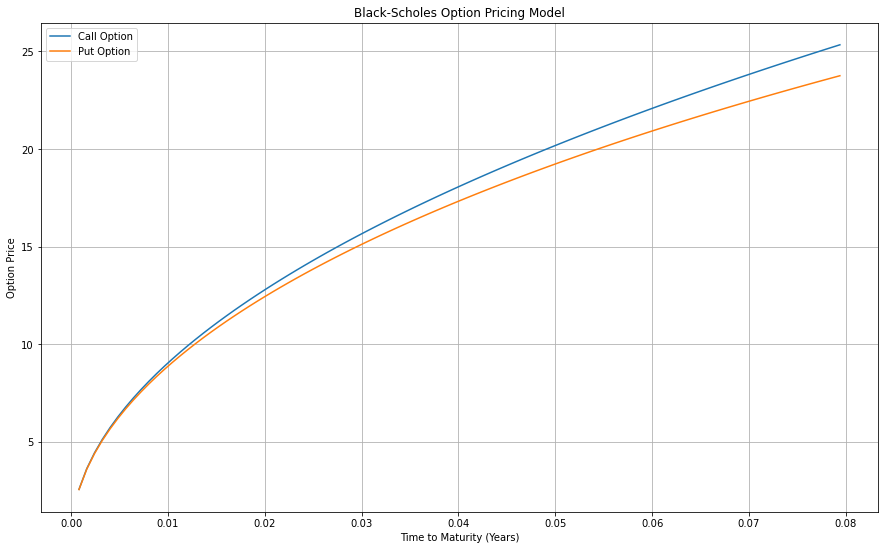

In [454]:
model.plot_time()